In [12]:
# Importing the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the course datasets 
climate_change = pd.read_csv('climate_change.csv', parse_dates=["date"], index_col="date")
medals = pd.read_csv('medals_by_country_2016.csv', index_col=0)
summer_2016 = pd.read_csv('summer2016.csv')
austin_weather = pd.read_csv("austin_weather.csv", index_col="DATE")
weather = pd.read_csv("seattle_weather.csv", index_col="DATE")

# Some pre-processing on the weather datasets, including adding a month column
seattle_weather = weather[weather["STATION"] == "USW00094290"] 
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
seattle_weather["MONTH"] = month 
austin_weather["MONTH"] = month

/tmp/ipykernel_689/3933900819.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_weather["MONTH"] = month


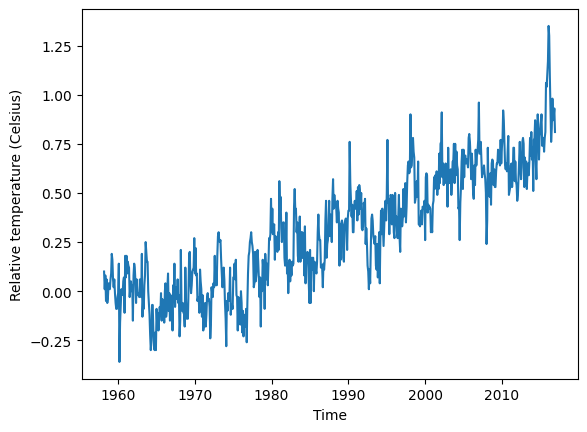

In [13]:
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

### Zooming in a specific time frame

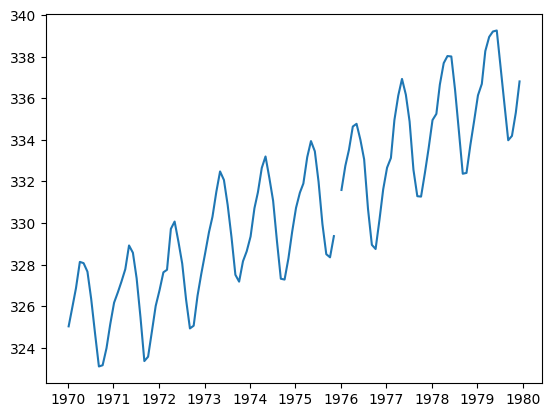

In [14]:
import matplotlib.pyplot as plt

# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01": "1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

In [15]:
# Defining a function to compare co2 and relative temp
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
  axes.plot(x, y, color=color)
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel, color=color)
  axes.tick_params('y', colors=color)

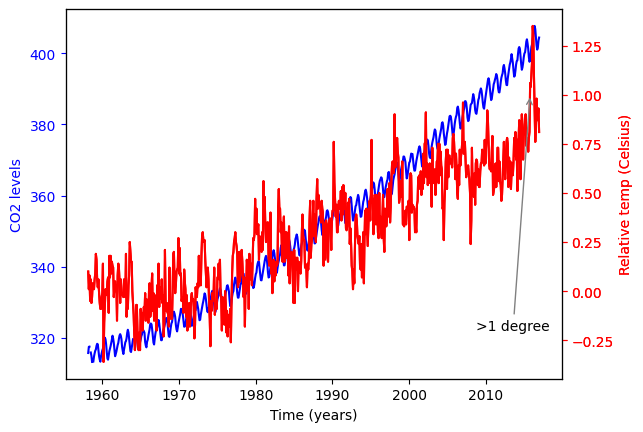

In [19]:
fig, ax = plt.subplots()

# Plotting the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

# Creating an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plotting the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change["relative_temp"], 'red', "Time (years)", "Relative temp (Celsius)")
# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plotting the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change["relative_temp"], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotating point with relative temperature >1 degree
ax2.annotate(">1 degree",
             xy=(pd.Timestamp('2015-10-06'), 1), 
             xytext=(pd.Timestamp('2008-10-06'), -0.2), 
             arrowprops={"arrowstyle":"->", "color":"gray"})

plt.show()